<a href="https://colab.research.google.com/github/tenoob/C-/blob/master/XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import xgboost
import pickle

In [54]:


train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education','education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [55]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [56]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [57]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


(array([11460., 12211.,  6558.,  2091.,   241.]),
 array([17. , 31.6, 46.2, 60.8, 75.4, 90. ]),
 <a list of 5 Patch objects>)

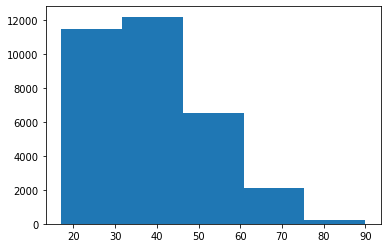

In [58]:
plt.hist(train_set['age'],bins=5)


(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

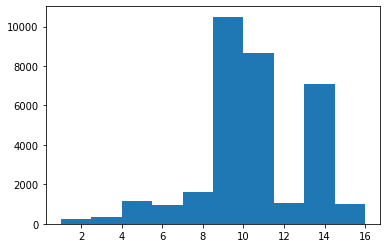

In [59]:
plt.hist(train_set['education_num'],bins=10)


(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <a list of 10 Patch objects>)

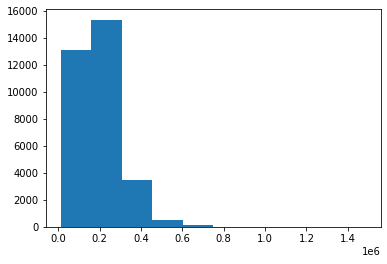

In [60]:
plt.hist(train_set['fnlwgt'],bins=10)


(array([ 2928., 20052.,  6996.,  2244.,   341.]),
 array([ 1. , 20.6, 40.2, 59.8, 79.4, 99. ]),
 <a list of 5 Patch objects>)

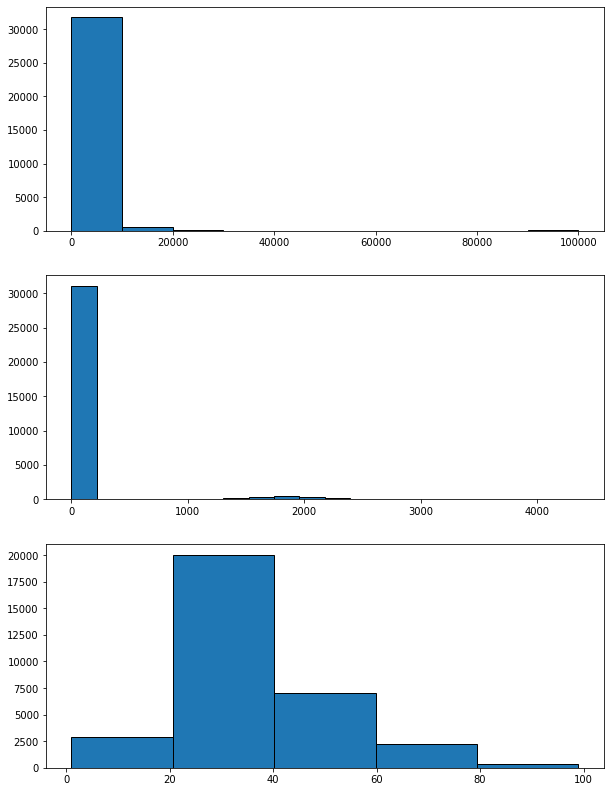

In [61]:
fig, (ax1,ax2 , ax3) = plt.subplots(3,1,figsize=(10,14))

ax1.hist(train_set['capital_gain'], edgecolor = "black", bins = 10)
ax2.hist(train_set['capital_loss'], edgecolor = "black", bins = 20)
ax3.hist(train_set['hours_per_week'], edgecolor = "black", bins = 5)

In [62]:
print(train_set['capital_loss'].value_counts().unique())
print(train_set['capital_loss'].unique())
print(train_set['capital_loss'].value_counts())


[31042   202   168   159    51    49    47    42    40    39    34    25
    24    23    22    21    20    18    17    15    14    12    10     9
     8     7     6     5     4     3     2     1]
[   0 2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876
 1340 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653
 2392 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547
 2174 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1594 3004
 2231 1844  810 2824 2559 2057 1974  974 2149 1825 1735 1258 2129 2603
 2282  323 4356 2246 1617 1648 2489 3770 1755 3683 2267 2080 2457  155
 3900 2201 1944 2467 2163 2754 2472 1411]
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64


In [63]:
print(train_set['capital_gain'].value_counts().unique())
print(train_set['capital_gain'].unique())
print(train_set['capital_gain'].value_counts())


[29849   347   284   246   159    97    70    69    55    53    48    43
    42    41    37    34    32    31    27    26    25    24    23    22
    20    19    17    16    15    14    12    11     9     8     7     6
     5     4     3     2     1]
[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797
  1173  4687  6723  2009  6097  2653  1639 18481  7978  2387  5060]
0        29849
15024    

In [64]:
print(train_set['hours_per_week'].value_counts().unique())
print(train_set['hours_per_week'].unique())
print(train_set['hours_per_week'].value_counts())


[15217  2819  1824  1475  1297  1224  1149   694   674   517   476   404
   291   278   266   252   244   220   219   212   205   173   151   149
   145   138   133    97    86    85    82    75    71    66    64    60
    54    49    45    44    41    39    38    36    34    32    30    29
    28    26    25    24    23    21    20    18    17    14    13    12
    11    10     8     7     6     5     4     3     2     1]
[40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95]
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours_per_week, Length: 94, dtype: int64


In [65]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [66]:
workclass = pd.get_dummies(train_set['workclass'],prefix='Workclass',drop_first=True)

In [67]:
workclass.head()

,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [68]:
education = pd.get_dummies(train_set['education'],prefix='Education',drop_first=True)

In [69]:
education.head()

,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [71]:
marital_status = pd.get_dummies(train_set['marital_status'],prefix='Marital_status',drop_first=True)
occupation = pd.get_dummies(train_set['occupation'],prefix='Occupation',drop_first=True)
relationship = pd.get_dummies(train_set['relationship'],prefix='Relationship',drop_first=True)
race = pd.get_dummies(train_set['race'],prefix='Race',drop_first=True)
sex = pd.get_dummies(train_set['sex'],prefix='Sex',drop_first=True)
native_country = pd.get_dummies(train_set['native_country'],prefix='Native_country',drop_first=True)
wage_class = pd.get_dummies(train_set['wage_class'],prefix='wage_class',drop_first=True)


In [72]:
wage_class.head()

,wage_class_ >50K
0,0
1,0
2,0
3,0
4,0


In [73]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [74]:
cols = ['age','education_num','capital_gain','capital_loss','hours_per_week']

In [75]:
scaler = preprocessing.StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(train_set[cols]),columns=cols)
print(scaled)

            age  education_num  capital_gain  capital_loss  hours_per_week
0      0.030671       1.134739      0.148453      -0.21666       -0.035429
1      0.837109       1.134739     -0.145920      -0.21666       -2.222153
2     -0.042642      -0.420060     -0.145920      -0.21666       -0.035429
3      1.057047      -1.197459     -0.145920      -0.21666       -0.035429
4     -0.775768       1.134739     -0.145920      -0.21666       -0.035429
...         ...            ...           ...           ...             ...
32556 -0.849080       0.746039     -0.145920      -0.21666       -0.197409
32557  0.103983      -0.420060     -0.145920      -0.21666       -0.035429
32558  1.423610      -0.420060     -0.145920      -0.21666       -0.035429
32559 -1.215643      -0.420060     -0.145920      -0.21666       -1.655225
32560  0.983734      -0.420060      1.888424      -0.21666       -0.035429

[32561 rows x 5 columns]


In [76]:
X = pd.concat([scaled,workclass,education,marital_status,occupation,relationship,race,sex,native_country],axis=1)

In [77]:
X.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
X.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,-0.995706,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.042642,-0.420060,-0.145920,-0.21666,0.774468,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.775768,0.746039,-0.145920,-0.21666,-0.035429,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.397233,-0.031360,0.895083,-0.21666,-0.035429,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.508894,-0.031360,-0.145920,-0.21666,-0.845327,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
type(wage_class)

pandas.core.frame.DataFrame

In [86]:
y = wage_class.iloc[:,0]

In [87]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: wage_class_ >50K, Length: 32561, dtype: uint8

train test split

In [91]:
X_train, x_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [92]:
xg = xgboost.XGBClassifier(random_state=0)

param_grid = { "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
                "max_depth"        : [ 3, 6, 8, 12, 15],
                "min_child_weight" : [ 1, 3, 5, 7 ],
                "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
        
}

search = HalvingGridSearchCV(xg,param_grid,cv=10,
                             factor=5,aggressive_elimination=True,
                             return_train_score=True,n_jobs=-1,verbose=2).fit(X_train,y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 41
max_resources_: 26048
aggressive_elimination: True
factor: 5
----------
iter: 0
n_candidates: 2400
n_resources: 41
Fitting 10 folds for each of 2400 candidates, totalling 24000 fits
----------
iter: 1
n_candidates: 480
n_resources: 205
Fitting 10 folds for each of 480 candidates, totalling 4800 fits
----------
iter: 2
n_candidates: 96
n_resources: 1025
Fitting 10 folds for each of 96 candidates, totalling 960 fits
----------
iter: 3
n_candidates: 20
n_resources: 5125
Fitting 10 folds for each of 20 candidates, totalling 200 fits
----------
iter: 4
n_candidates: 4
n_resources: 25625
Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [93]:
print(search.best_params_)
print(search.best_score_)

{'colsample_bytree': 0.3, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1}
0.8691541226242065


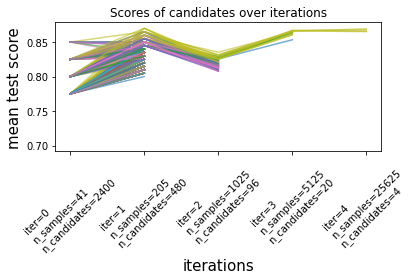

In [94]:
results = pd.DataFrame(search.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={search.n_resources_[i]}\nn_candidates={search.n_candidates_[i]}"
    for i in range(search.n_iterations_)
]

ax.set_xticks(range(search.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)
plt.tight_layout()
plt.show()

In [95]:
best_model = xgboost.XGBClassifier(**search.best_params_)
best_model.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.3, gamma=0.1, learning_rate=0.2)

In [97]:
y_pred = best_model.predict(x_test)


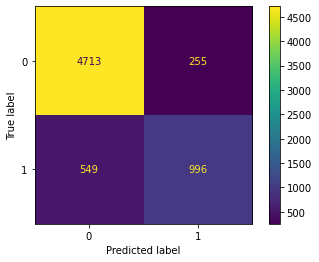

In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [99]:
from sklearn import metrics

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4968
           1       0.80      0.64      0.71      1545

    accuracy                           0.88      6513
   macro avg       0.85      0.80      0.82      6513
weighted avg       0.87      0.88      0.87      6513



Valdation

In [129]:
train_set['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [115]:
test_set['native_country'].unique()

array([' United-States', ' ?', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       'Holand-Netherlands', ' Scotland', ' Jamaica', ' Ecuador',
       ' Yugoslavia', ' Hungary', ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [130]:
workclass = pd.get_dummies(test_set['workclass'],prefix='Workclass',drop_first=True)
education = pd.get_dummies(test_set['education'],prefix='Education',drop_first=True)
marital_status = pd.get_dummies(test_set['marital_status'],prefix='Marital_status',drop_first=True)
occupation = pd.get_dummies(test_set['occupation'],prefix='Occupation',drop_first=True)
relationship = pd.get_dummies(test_set['relationship'],prefix='Relationship',drop_first=True)
race = pd.get_dummies(test_set['race'],prefix='Race',drop_first=True)
sex = pd.get_dummies(test_set['sex'],prefix='Sex',drop_first=True)
native_country = pd.get_dummies(test_set['native_country'],prefix='Native_country',drop_first=True)
wage_class = pd.get_dummies(test_set['wage_class'],prefix='wage_class',drop_first=True)


In [131]:

scaled = pd.DataFrame(scaler.transform(test_set[cols]),columns=cols)
print(scaled)

            age  education_num  capital_gain  capital_loss  hours_per_week
0     -0.995706      -1.197459     -0.145920      -0.21666       -0.035429
1     -0.042642      -0.420060     -0.145920      -0.21666        0.774468
2     -0.775768       0.746039     -0.145920      -0.21666       -0.035429
3      0.397233      -0.031360      0.895083      -0.21666       -0.035429
4     -1.508894      -0.031360     -0.145920      -0.21666       -0.845327
...         ...            ...           ...           ...             ...
16276  0.030671       1.134739     -0.145920      -0.21666       -0.359389
16277  1.863485      -0.420060     -0.145920      -0.21666       -0.035429
16278 -0.042642       1.134739     -0.145920      -0.21666        0.774468
16279  0.397233       1.134739      0.592721      -0.21666       -0.035429
16280 -0.262580       1.134739     -0.145920      -0.21666        1.584366

[16281 rows x 5 columns]


In [132]:
X = pd.concat([scaled,workclass,education,marital_status,occupation,relationship,race,sex,native_country],axis=1)
X.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,-0.995706,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.042642,-0.420060,-0.145920,-0.21666,0.774468,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.775768,0.746039,-0.145920,-0.21666,-0.035429,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.397233,-0.031360,0.895083,-0.21666,-0.035429,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.508894,-0.031360,-0.145920,-0.21666,-0.845327,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [133]:
y = wage_class.iloc[:,0]

In [134]:
y_pred = best_model.predict(X)

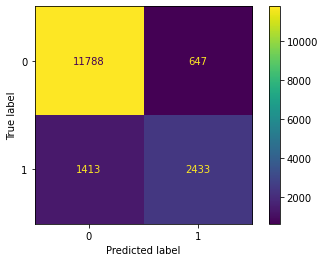

In [136]:
cm = confusion_matrix(y, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [137]:
print(metrics.classification_report(y,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92     12435
           1       0.79      0.63      0.70      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.79      0.81     16281
weighted avg       0.87      0.87      0.87     16281



In [142]:
filename = 'xgboost.pkl'
pickle.dump(best_model,open(filename,'wb'))